# Big Data w biznesie

## Trzeci notebook zadania

#### Zaimportuj biblioteki numpy, pandas, matplotlib i seaborn.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Załaduj plik csv.
***
Do zmiennej `df` załaduj plik `cars.csv`.

In [4]:
file = '/Users/kasia/Desktop/programowanie/big-data/cw_1/cars.csv'
df = pd.read_csv(file)

#### Wyświetl pierwsze 5 linijek obiektu ''df''.

In [5]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


#### Narysuj wykres pudełkowego
***
Narysuj wykres, który przedstawi zależność typu silnika od ceny.

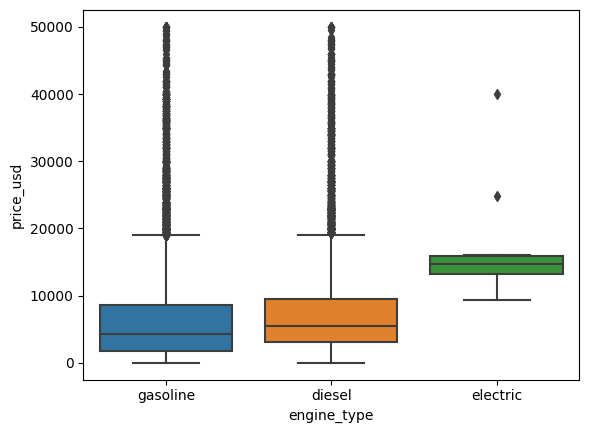

In [7]:
# Tworzenie wykresu pudełkowego
sns.boxplot(x='engine_type', y='price_usd', data=df)
#plt.ylim(0,)
plt.show()

#### Popraw wykres pudełkowego
***
Popraw wykres, tak żeby zakres cen na wykresie zaczynał się od 0.

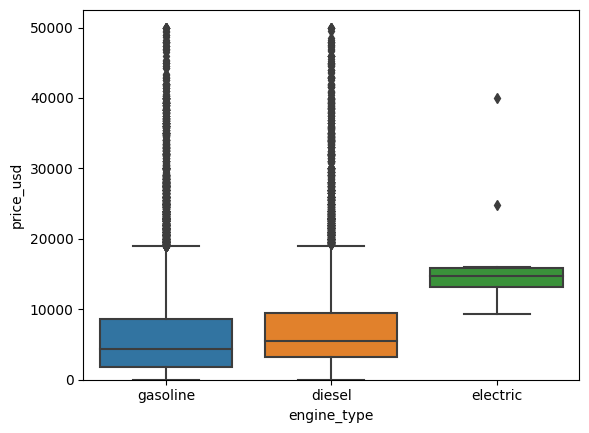

In [8]:
sns.boxplot(x='engine_type', y='price_usd', data=df)
plt.ylim(0,)
plt.show()

#### Stwórz dummy variables.
***
Stwórz obiekt `dummy_variable` z danych w kolumnie `'engine_type'`.

In [9]:
dummy_variable = pd.get_dummies(df['engine_type'])
dummy_variable

,diesel,electric,gasoline
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
38526,0,0,1
38527,1,0,0
38528,0,0,1
38529,0,0,1


#### Zmień nazwy kolumn w dummy variables.
***
Zmień nazwy kolumn w obiekcie `dummy_variable`, tak żeby każda kolumna zaczynała się od `'engine_type-'`.

In [10]:
dummy_variable = dummy_variable.rename(columns={'diesel':'engine_type-diesel', 'electric':'engine_type-electric', 'gasoline':'engine_type-gasoline'})

#### Dodaj dummy variables do DataFrame'a.
***
Połącz ze sobą stworzony obiekt `'dummy viariable'` z obiektem `'df'`.

In [11]:
df = pd.concat([df, dummy_variable], axis=1)
#df = df.drop('transmission', axis = 1)
df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,engine_type-diesel,engine_type-electric,engine_type-gasoline
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,False,True,False,True,True,True,16,0,0,1
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,True,False,False,False,True,83,0,0,1
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,False,False,False,False,True,True,151,0,0,1
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,86,0,0,1
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,True,7,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,True,False,False,True,True,301,0,0,1
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,True,False,False,True,True,317,1,0,0
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,True,False,False,True,True,369,0,0,1
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,False,False,False,False,False,True,490,0,0,1


#### Stwórz pivot table.
***
Stwórz tabelę, która będzie obrazować jak typ karoserii (`'body_type'`) i kolor wypływają na średnią długość łącznego czasu wystawienia (`'duration_listed'`)

In [12]:
pivot_table = pd.pivot_table(df, values='duration_listed', index='color', columns='body_type', aggfunc='mean')
pivot_table

body_type,cabriolet,coupe,hatchback,liftback,limousine,minibus,minivan,pickup,sedan,suv,universal,van
color,,,,,,,,,,,,
black,111.608696,94.453416,78.265213,44.000000,348.0,107.303030,90.804527,113.333333,82.117628,86.780162,83.217437,117.466667
blue,232.000000,68.696078,76.747384,40.793651,NaN,89.282407,78.119534,244.066667,79.718913,77.865482,76.903193,77.051020
brown,333.000000,54.000000,69.764151,39.260870,NaN,60.600000,92.666667,73.000000,76.827476,79.011278,62.166667,101.666667
green,152.750000,91.218750,83.560976,45.600000,NaN,66.388235,63.891791,57.833333,74.498866,100.924603,72.919132,138.459459
grey,416.200000,62.454545,77.682749,44.328571,NaN,78.098039,78.290828,122.833333,76.415488,89.793419,69.389734,48.363636
orange,NaN,99.428571,72.928571,12.000000,NaN,110.923077,174.142857,152.333333,54.500000,150.733333,89.642857,85.705882
other,148.000000,92.690476,81.451677,47.700000,NaN,105.978261,66.783465,199.833333,75.998211,99.341615,80.726727,46.888889
red,227.750000,83.333333,70.699399,48.333333,NaN,80.450980,79.878173,142.428571,76.168715,80.188119,77.763473,151.134615
silver,104.000000,85.617978,80.612230,41.926230,NaN,94.149351,73.398374,62.411765,80.787351,89.873918,80.540383,83.285714


#### Wypełnij brakujące wartości w pivot table.
***
Wszystkie komórki z brakującymi wartościami wypełnij średnią długością łącznego czasu wystawienia dla samochodów o takim samym typie karoserii.

In [13]:
pivot_table = pivot_table.fillna(pivot_table.mean(axis=0))
pivot_table

body_type,cabriolet,coupe,hatchback,liftback,limousine,minibus,minivan,pickup,sedan,suv,universal,van
color,,,,,,,,,,,,
black,111.608696,94.453416,78.265213,44.000000,348.0,107.303030,90.804527,113.333333,82.117628,86.780162,83.217437,117.466667
blue,232.000000,68.696078,76.747384,40.793651,195.6,89.282407,78.119534,244.066667,79.718913,77.865482,76.903193,77.051020
brown,333.000000,54.000000,69.764151,39.260870,195.6,60.600000,92.666667,73.000000,76.827476,79.011278,62.166667,101.666667
green,152.750000,91.218750,83.560976,45.600000,195.6,66.388235,63.891791,57.833333,74.498866,100.924603,72.919132,138.459459
grey,416.200000,62.454545,77.682749,44.328571,195.6,78.098039,78.290828,122.833333,76.415488,89.793419,69.389734,48.363636
orange,193.065942,99.428571,72.928571,12.000000,195.6,110.923077,174.142857,152.333333,54.500000,150.733333,89.642857,85.705882
other,148.000000,92.690476,81.451677,47.700000,195.6,105.978261,66.783465,199.833333,75.998211,99.341615,80.726727,46.888889
red,227.750000,83.333333,70.699399,48.333333,195.6,80.450980,79.878173,142.428571,76.168715,80.188119,77.763473,151.134615
silver,104.000000,85.617978,80.612230,41.926230,195.6,94.149351,73.398374,62.411765,80.787351,89.873918,80.540383,83.285714


#### Stwórz pivot table innym sposobem.
***
Najpierw pogrupuj dane po kolumnach `'body_type'` i `'color'`, a następnie dla każdej grupy policz średnią długość łącznego czasu wystawienia.

Następnie przekształć ten obiekt w pivot table za pomocą metody `df.pivot()`.

In [15]:
df_pivot = df.groupby(['color', 'body_type'], as_index=False)['duration_listed'].mean()
df_pivot_table = df_pivot.pivot(index='color', columns='body_type')
df_pivot_table

duration_listed                                             \
body_type       cabriolet      coupe  hatchback   liftback limousine   
color                                                                  
black          111.608696  94.453416  78.265213  44.000000     348.0   
blue           232.000000  68.696078  76.747384  40.793651       NaN   
brown          333.000000  54.000000  69.764151  39.260870       NaN   
green          152.750000  91.218750  83.560976  45.600000       NaN   
grey           416.200000  62.454545  77.682749  44.328571       NaN   
orange                NaN  99.428571  72.928571  12.000000       NaN   
other          148.000000  92.690476  81.451677  47.700000       NaN   
red            227.750000  83.333333  70.699399  48.333333       NaN   
silver         104.000000  85.617978  80.612230  41.926230       NaN   
violet          64.000000  52.500000  75.330097  36.000000       NaN   
white          151.750000  76.888889  87.665625  43.353846      43.2   
yellow         182.666667  70.272727  78.721519  84.400000       NaN   

                                                                       \
body_type     minibus     minivan      pickup       sedan         suv   
color                                                                   
black      107.303030   90.804527  113.333333   82.117628   86.780162   
blue        89.282407   78.119534  244.066667   79.718913   77.865482   
brown       60.600000   92.666667   73.000000   76.827476   79.011278   
green       66.388235   63.891791   57.833333   74.498866  100.924603   
grey        78.098039   78.290828  122.833333   76.415488   89.793419   
orange     110.923077  174.142857  152.333333   54.500000  150.733333   
other      105.978261   66.783465  199.833333   75.998211   99.341615   
red         80.450980   79.878173  142.428571   76.168715   80.188119   
silver      94.149351   73.398374   62.411765   80.787351   89.873918   
violet      74.000000  104.354167         NaN   74.324841   90.350000   
white       96.777154   83.882143  131.304348   80.703267   82.385870   
yellow      84.866667   39.764706  102.333333  114.127273   52.727273   

                                  
body_type  universal         van  
color                             
black      83.217437  117.466667  
blue       76.903193   77.051020  
brown      62.166667  101.666667  
green      72.919132  138.459459  
grey       69.389734   48.363636  
orange     89.642857   85.705882  
other      80.726727   46.888889  
red        77.763473  151.134615  
silver     80.540383   83.285714  
violet     89.926316   61.750000  
white      73.490239   91.638298  
yellow     82.043478   90.000000

#### Zastosuj stylowanie.
***
Weź stworzony komórkę wyżej obiekt (`df_pivot_table`) i zastosuj na nim stylowanie z następującymi elementami:
- tytuł wykresu
- tło komórki ma mieć różny kolor w zależności od wielkości w komórce
- sformatowane wartości w komórce (liczby całkowite bez przecinka, wartości brakujące jaki napis "brak"
- podświetlenie największych wartości
- ustawienie odpowiednich marginesów w komórkach (padding)

In [21]:
df_pivot_table.style\
    .format('{:.3f}', na_rep="brak")\
    .background_gradient(cmap="magma")\
    .set_caption("Średnia długość wystawienia w zaleności od koloru i typu karoserii")\
    .highlight_max(color="Pink")\
    .set_properties(padding='8px 20px')

#### Narysuj heatmapę wartości z pivot table.
***

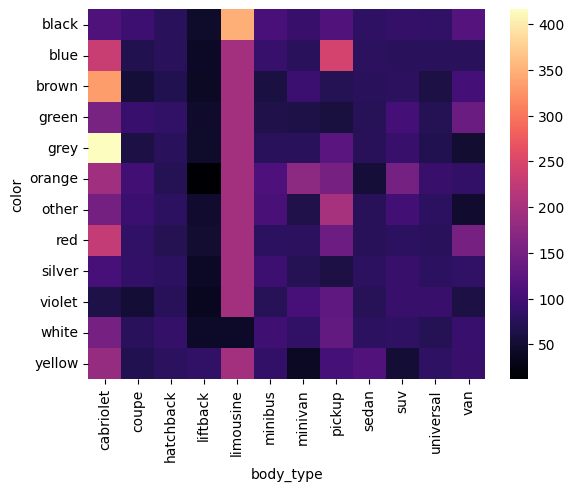

In [18]:
sns.heatmap(pivot_table, cmap='magma')
plt.show()

#### Stwórz scatter plot przy pomocy pandasa.
***
Zobrazuj zależność pomiędzy przebiegiem a ceną, używając do tego funkcji z biblioteki pandas.

In [22]:
df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed', 'engine_type-diesel',
       'engine_type-electric', 'engine_type-gasoline'],
      dtype='object')

<Axes: title={'center': 'Drivetrain vs Price'}, xlabel='odometer_value', ylabel='price_usd'>

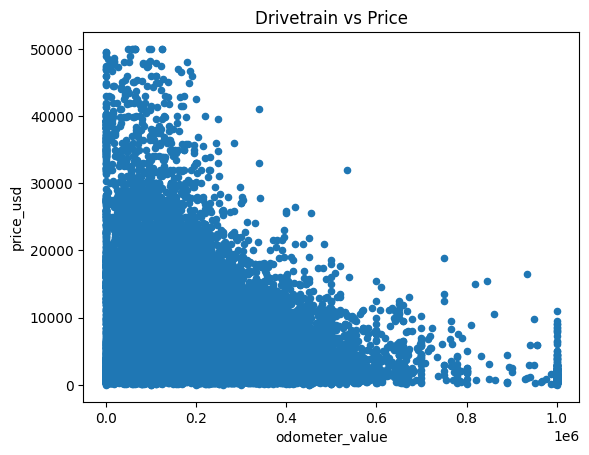

In [24]:
df.plot(kind='scatter',
        x='odometer_value',
        y='price_usd',
        title='Drivetrain vs Price')

#### Stwórz scatter plot przy pomocy matplotliba.
***
Zobrazuj zależność pomiędzy przebiegiem a ceną, używając do tego funkcji z biblioteki matplotliba.

Text(0.5, 1.0, 'Odometer vs Price')

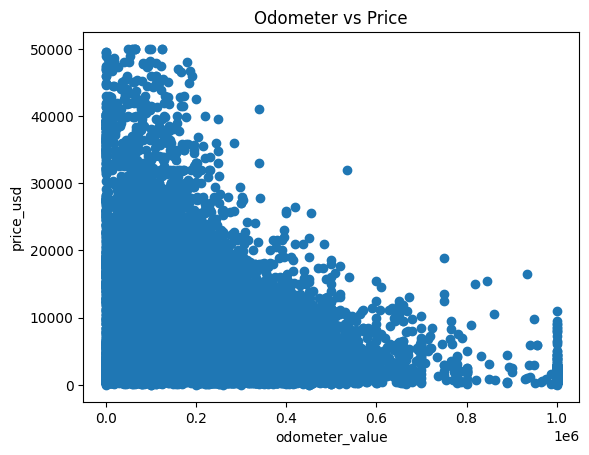

In [25]:
plt.scatter(df['odometer_value'], df['price_usd'],)
plt.xlabel("odometer_value")
plt.ylabel("price_usd")
plt.title('Odometer vs Price')

#### Stwórz scatter plot przy pomocy seaborna.
***
Zobrazuj zależność pomiędzy przebiegiem a ceną, używając do tego funkcji z biblioteki seaborna.

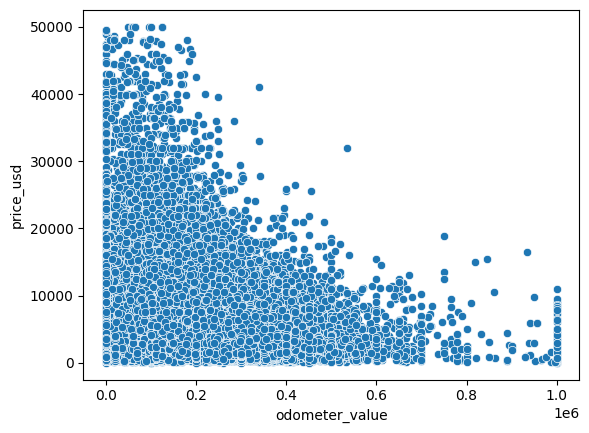

In [26]:
sns.scatterplot(x="odometer_value", y="price_usd", data=df)
plt.show()

#### Popraw scatter plot przy pomocy seaborna.
***
Zmniejsz rozmiar znaczników i zmień ich kolor na zielony. Ogranicz oś x i y tak, żeby zaczynały się od zera. Usuń obwódkę wokół znaczników (`edgecolor`). Usuń ramkę wokół wykresu (`sns.despine`).

#### Podziel na biny.
***
Podziel wartości cen samochodów na 5 binów ('Low', 'Medium-Low', 'Medium', 'Medium-High', 'High').

In [ ]:
bins =

#### Rozdziel na biny.
***
Stwórz nową kolumnę `'price_usd_binned'` i przyporządkuj każdą wartość do jednego z 5 binów ('Low', 'Medium-Low', 'Medium', 'Medium-High', 'High').

#### Narysuj histogram z binami za pomocą pandasa.
***
Stwórz histogram, który sam podzieli wartości z kolumny `'price_usd'` na 5 binów.

#### Narysuj histogram z binami za pomocą matplotliba.
***
Stwórz histogram, który sam podzieli wartości z kolumny `'price_usd'` na 5 binów.

#### Narysuj histogram z binami za pomocą matplotliba.
***
Stwórz histogram wartości z kolumny `'price_usd_binned'`.

#### Narysuj histogram z binami za pomocą seaborna.
***
Stwórz histogram, który sam podzieli wartości z kolumny `'price_usd'` na 5 binów.

#### Narysuj histogram z binami za pomocą seaborna.
***
Stwórz histogram wartości z kolumny `'price_usd_binned'`.

#### Zmień histogram z binami za pomocą seaborna.
***
Nadaj tytuł wykresowi, obróć nazwy binów o 90 stopni, zmień kolor słupków na czerwony, pogrub kontur słupków i zmień kolor konturu na czarny.

#### Pokaż na wykresie, której wartości danych jest najwięcej.
***
Pokaż na wykresie, której marki samochodów jest najwięcej.
NIE używaj do tego `sns.histplot()`.

#### Popraw wykres, przedstawiający której wartości danych jest najwięcej.
***
Zmień podpisy przy osi x, żeby na nachodziły na siebie (obróć i zmniejsz czcionkę).
Ustaw słupki według malejącej liczby wystąpień - argument `'order'` (`df['manufacturer_name'].value_counts().index` zwraca listę kolumny w kolejności, jeśli chodzi o malejącą liczbę wystąpień).

#### Policz korelacje.
***
Policz korelację między wszystkimi kolumnami zawierającymi dane numeryczne.

#### Narysuj heatmapę korelacji.
***
Spróbuj różnych wartości argumentu `'cmap'`.

#### Narysuj wykres dla dwóch zmiennych z dodatnią korelacją.
***
Na heatmapie znajdź dwie zmienne z dodatnią korelacją.
Narysuj ich wykres wraz z linią regresji.
Zmień kolor linii regresji na czerwony i upewnij się, że osie x i y zaczynają się i kończą przy odpowiednich wartościach.

#### Narysuj wykres dla dwóch zmiennych z korelacją bliską zera.
***
Na heatmapie znajdź dwie zmienne z korelacją bliską zera.
Narysuj ich wykres wraz z linią regresji.
Zmień kolor linii regresji na czerwony i upewnij się, że osie x i y zaczynają się i kończą przy odpowiednich wartościach.

#### Narysuj wykres dla dwóch zmiennych z ujemną korelacją.
***
Na heatmapie znajdź dwie zmienne z ujemną korelacją.
Narysuj ich wykres wraz z linią regresji.
Zmień kolor linii regresji na czerwony i upewnij się, że osie x i y zaczynają się i kończą przy odpowiednich wartościach.

#### Wybierz dane dla konkretnej marki samochodu
***
Stwórz nowy obiekt `'df_manufacturer'`, w którym będą znajdować się tylko samochody marki `'Land Rover'`.

In [ ]:
df_manufacturer =

#### Podziel dane ze względu na model samochodu.
***
Pogrupuj dane ze względu na model samochodu i dla każdej podgrupy policzyć średnią cenę i liczbę obiektów w danej podgrupie.

#### Stwórz wykres skrzypcowy przedstawiający rozkład cen ze względu na model samochodu
***
Korzystając z danych zawartych w obiekcie `'df_manufacturer'`, zwizualizuj rozkład cen w zależności od modelu.

#### Popraw wykres skrzypcowy przedstawiający rozkład cen ze względu na model samochodu
***
Zmniejsz grubość konturów, ogranicz oś y, żeby zaczynała się w zerze, zmień podpisy przy osi x, żeby na nachodziły na siebie.

#### Skorzystaj z catplot, żeby stworzyć kilka wykresów skrzypcowych.
***
Wykresy skrzypcowe mają ilustrować rozkład przebiegu (`'odometer_value'`) w zależności od rodzaju napędu (`'drivetrain'`) i rodzaju skrzyni biegów (`'transmission'`). W każdej kolumnie będzie osobny wykres dla każdego rodzaju silnika (`'engine_type'`).